# Calculate iVIX using multiple ways

In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
from db_connect import DB_connect 
import options_util as ou
import util
import numpy as np
import pandas as pd
import vix_calc 
import matplotlib.pyplot as plt

## Method 1: Variance Swap

## Method 2: Implied Volatility

## Benchmark: Wind iVIX

In [62]:
data = ou.get_opt_infos()
dates = ou.get_dates()
vix1 = ou.calculate_VIX_series(data, method="var_swap")
vix2 = ou.calculate_VIX_series(data, method="implied_vol")

Oracle Client has started.
Connected to Database.
Query starts >>>
Query ends <<<
Connection to Database closed.
Oracle Client has started.
Connected to Database.
Query starts >>>
Query ends <<<
Connection to Database closed.


In [63]:
# import benchmark ivix data
csv = pd.read_csv('ivix.csv')
csv = csv[csv['purpose'] == 'WIND']
csv['trade_date'] = pd.to_datetime(csv['trade_date'], format='%Y%m%d')
csv.drop(columns=['purpose', 'underlier'], inplace=True)
csv = csv.set_index('trade_date')

<AxesSubplot:xlabel='trade_date'>

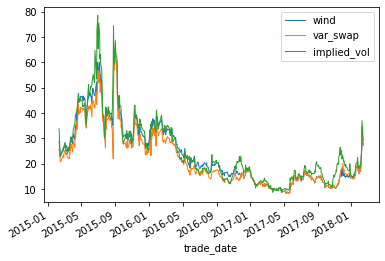

In [65]:
dates = pd.to_datetime(pd.unique(dates), format='%Y%m%d')
csv['var_swap'] = vix1[:739]
csv['implied_vol'] = vix2[:739]
csv.rename(columns={"close": "wind"}, inplace=True)
csv.plot(linewidth=1)
